In [1]:
import os
import torch
from ochuman_dataset import OCHumanDataset
from utils.misc import collate_fn

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def show_img(images, outputs, cpu_device=torch.device("cpu")):
    overall_mask = np.zeros((600, 600, 1))
    for i in range(len(outputs[0]["masks"])):
        mask = outputs[0]["masks"][i].to(cpu_device).permute(1, 2, 0).detach().numpy()
        mask[mask < 0.2] = 0
        mask[mask >= 0.2] = 1
        overall_mask += mask

    img = images[0].to(cpu_device).permute(1, 2, 0).numpy()

    overall_mask[overall_mask > 0] = 1

    plt.figure(figsize = (7, 7))
    plt.imshow(img)
    plt.imshow(overall_mask, alpha=0.3)
    plt.show()

In [3]:
if __name__ == "__main__":
    file_ids = []
    for _, _, file_names in os.walk(os.path.join("../dataset", "annotations", "test")):
        for file_name in file_names:
            file_ids.append(file_name[:-5])
    
    dataset_test = OCHumanDataset(
                        root_dir="../dataset/",
                        img_ids=file_ids,
                        transforms=None
                    )
    data_loader_test = torch.utils.data.DataLoader(
                        dataset_test, 
                        batch_size=4, 
                        shuffle=False, 
                        num_workers=4,
                        collate_fn = collate_fn
                    )

    device = torch.device("cuda")
    cpu_device = torch.device("cpu") 

    model = torch.load("../out/weights/1.pth")
    model.to(device)
    model.eval()

    for i, (images, targets) in enumerate(data_loader_test):
        print(i)
        images = list(img.to(device) for img in images)
        outputs = model(images)
        show_img(images, outputs)     

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

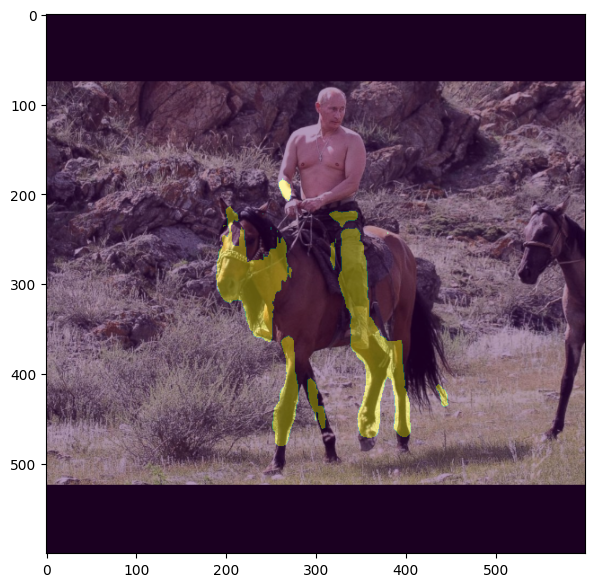

In [3]:

#plt.show()

In [31]:
import numpy as np
from utils.bbox_util import *
output = outputs[0]["boxes"].to(cpu_device)
#output = {k: v.item() for k, v in output.items()}
output = output.detach().numpy().astype('uint8')
output = np.array([np.append(item, 1) for item in output])
output

array([[195,  60, 136, 157,   1],
       [175,  29,  76,  85,   1],
       [226, 118, 188, 221,   1],
       [165,  16,   6,   1,   1],
       [126,  30, 217,  58,   1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


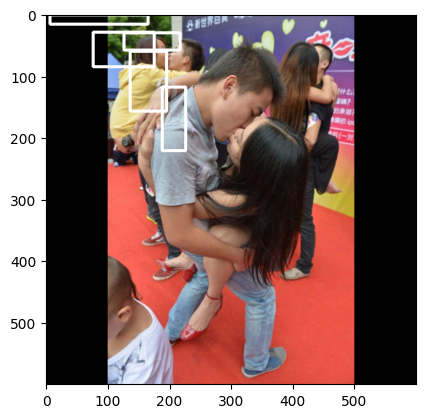

In [32]:
import matplotlib.pyplot as plt
from utils.bbox_util import *

img = images[0].to(cpu_device)
img = img.permute(1, 2, 0).numpy()
print(img)
plotted_img = draw_rect(img, output)
plt.imshow(plotted_img)


In [30]:
out_ = np.array(output)[:,:4]

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

RuntimeError: DataLoader worker (pid(s) 3468, 9504, 25236, 3760) exited unexpectedly